## COLAB TOOLS

In [15]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:

import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "Colab Notebooks/prj_neuroread_analysis/neuroread/"
GOOGLE_DRIVE_PATH = os.path.join("/content", "drive", "MyDrive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Add to sys so we can import .py files.
sys.path.append(GOOGLE_DRIVE_PATH)
os.chdir(GOOGLE_DRIVE_PATH)

# Install unavailable packages
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])

import_or_install("mne")


['.git', '.DS_Store', '.gitignore', 'EEG', 'LICENSE', 'README.md', 'train_cl_eeg2speech_2.ipynb', 'train_cl_eeg2speech_rochester_subj_2.ipynb', 'train_cl_eeg2speech_rochester_v1.ipynb', 'train_eeg2speech_rochester.ipynb', 'train_cl_eeg2speech_rochester_v2.ipynb', 'train_cl_eeg2speech_rochester_v3.ipynb', 'train_cl_eeg2speech_rochester_v3_test.ipynb']


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Collecting mne

Downloading mne-1.3.1-py3-none-any.whl (7.6 MB)

Output()

Requirement already satisfied: packaging in /usr/local/lib/python3.8/dist-packages (from mne) (23.0)

Requirement already satisfied: jinja2 in /usr/local/lib/python3.8/dist-packages (from mne) (3.1.2)

Requirement already satisfied: numpy>=1.15.4 in /usr/local/lib/python3.8/dist-packages (from mne) (1.22.4)

Requirement already satisfied: matplotlib in /usr/local/lib/python3.8/dist-packages (from mne) (3.5.3)

Requirement already satisfied: pooch>=1.5 in /usr/local/lib/python3.8/dist-packages (from mne) (1.6.0)

Requirement already satisfied: tqdm in /usr/local/lib/python3.8/dist-packages (from mne) (4.64.1)

Requirement already satisfied: scipy>=1.1.0 in /usr/local/lib/python3.8/dist-packages (from mne) (1.7.3)

Requirement already satisfied: decorator in /usr/local/lib/python3.8/dist-packages (from mne) (4.4.2)

Requirement already satisfied: requests>=2.19.0 in /usr/local/lib/python3.8/dist-packages (from pooch>=1.5->mne) (2.25.1)

Requirement already satisfied: appdirs>=1.3.0 in /usr/local/lib/python3.8/dist-packages (from pooch>=1.5->mne) (1.4.4)

Requirement already satisfied: MarkupSafe>=2.0 in /usr/local/lib/python3.8/dist-packages (from jinja2->mne) (2.1.2)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.8/dist-packages (from matplotlib->mne) (4.38.0)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.8/dist-packages (from matplotlib->mne) (0.11.0)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.8/dist-packages (from matplotlib->mne) (2.8.2)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.8/dist-packages (from matplotlib->mne) (1.4.4)

Requirement already satisfied: pyparsing>=2.2.1 in /usr/local/lib/python3.8/dist-packages (from matplotlib->mne) (3.0.9)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.8/dist-packages (from matplotlib->mne) (8.4.0)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/dist-packages (from python-dateutil>=2.7->matplotlib->mne) (1.15.0)

Requirement already satisfied: chardet<5,>=3.0.2 in /usr/local/lib/python3.8/dist-packages (from requests>=2.19.0->pooch>=1.5->mne) (4.0.0)

Requirement already satisfied: urllib3<1.27,>=1.21.1 in /usr/local/lib/python3.8/dist-packages (from requests>=2.19.0->pooch>=1.5->mne) (1.26.14)

Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.8/dist-packages (from requests>=2.19.0->pooch>=1.5->mne) (2022.12.7)

Requirement already satisfied: idna<3,>=2.5 in /usr/local/lib/python3.8/dist-packages (from requests>=2.19.0->pooch>=1.5->mne) (2.10)

Installing collected packages: mne

Successfully installed mne-1.3.1

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
 print('Not connected to a GPU')
else:
 print(gpu_info)

Your runtime has 27.3 gigabytes of available RAM

Tue Feb 28 22:49:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                      

## Main code

In [1]:
import os, sys, glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np

import mne

import matplotlib
import matplotlib.pyplot as plt
import time

from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
def eval_model_cl(dl, model, device=torch.device('cpu'), verbose=True):
    """ 
    This function calculates the loss on data, setting backward gradients and batchnorm
    off. This function is written for contrasting learning where the model takes in two
    inputs.

    Args:

    Returns:
      loss_test: Mean loss of all test samples (scalar)

    """
    losses, losses_X1, losses_X2 = [], [], []
    model.to(device)  # inplace for model
    # Set the model in evaluation mode
    model.eval()

    with torch.no_grad():
        for idx_batch, (X1b, X2b) in enumerate(dl):

            X1b = X1b.to(device)
            X2b = X2b.to(device)

            X1b_features, X2b_features, logit_sc = model(X1b, X2b)

            # Normalize features
            X1b_f_n = X1b_features / X1b_features.norm(dim=1, keepdim=True)
            X2b_f_n = X2b_features / X2b_features.norm(dim=1, keepdim=True)

            logits_per_X1 = logit_sc * X1b_f_n @ X2b_f_n.t()
            logits_per_X2 = logits_per_X1.t()

            # Number of labels equals to the 1st dimension of X1b
            labels = torch.arange(X1b.shape[0], device=device)

            # Batch Loss 
            loss_X1 = F.cross_entropy(logits_per_X1, labels)
            loss_X2 = F.cross_entropy(logits_per_X2, labels)
            loss_batch   = (loss_X1 + loss_X2) / 2
            losses.append(loss_batch.item())
            losses_X1.append(loss_X1.item())
            losses_X2.append(loss_X2.item())

        # Epoch loss (mean of batch losses)
        loss  = sum(losses) / len(losses)
        loss_X1 = sum(losses_X1) / len(losses_X1)
        loss_X2 = sum(losses_X2) / len(losses_X2)

        if verbose:
          print(f"====> Validation loss: {loss:.4f},  X1 loss: {loss_X1:.4f}   X2 loss: {loss_X2:.4f}")

        return loss, loss_X1, loss_X2


In [3]:
def unfold_raw(raw, window_size=None, stride=None):
    """
    This function unfolds raw MNE object into a list of raw objects
    Args:
        raw: a raw MNE object cropped by rejecting bad segments.
    Returns:
        raw_unfolded: a raw MNE object unfolded by applying a sliding window.
    """
    if window_size is None:
        window_size = int(5 * raw.info['sfreq'])
    if stride is None:
        stride = window_size
    nchans = len(raw.ch_names)
    sig = torch.tensor(raw.get_data(), dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    sig_unf = F.unfold(sig, (nchans, window_size), stride=stride , padding=0)
    sig_unf = sig_unf.permute(0, 2, 1).reshape(-1, sig_unf.shape[-1], nchans, window_size)
    return sig_unf

In [4]:
def rm_repeated_annotations(raw):
    """This functions taskes in raw MNE obejct and removes repeated annotations"""
    annots = raw.annotations.copy()
    annots_drop = []
    for k in annots:
        annots_drop.extend([k for kk in annots if (k['onset'] > kk['onset']) and (k['onset']+k['duration'] < kk['onset']+kk['duration']) ])

    annots_updated = [i for i in annots if i not in annots_drop]
    onsets = [i['onset'] for i in annots_updated]
    durations = [i['duration'] for i in annots_updated]
    descriptions = [i['description'] for i in annots_updated]
    print('Initial num of annots: %d  Num of removed annots: %d  Num of retained annots:  %d' % (len(annots), len(annots_drop), len(annots_updated)))
    print(f' New annots: {annots_updated}')
    raw.set_annotations(mne.Annotations(onsets, durations, descriptions) ) 
    return raw

## Read Data

In [5]:
subj_ids = [3]
fs = 128
window_size = int(5 * fs)
stride_size_train, stride_size_val, stride_size_test = int(2.5 * fs), int(5 * fs), int(5 * fs)
n_channs = 129 # 128 for eeg, 1 for env
batch_size = int(32)
print('-------------------------------------')
print(f'window_size: {window_size}  stride_size_test: {stride_size_test}')

dataset_name = ['rochester_data', 'natural_speech']
outputs_path = f'../outputs/'
data_path = os.path.join(outputs_path, dataset_name[0], dataset_name[1])
print(f'data_path: {data_path}')

-------------------------------------
window_size: 640  stride_size_test: 640
data_path: ../outputs/rochester_data/natural_speech


In [6]:
raws_train_windowed, raws_val_windowed, raws_test_windowed = [], [], []

for subj_id in subj_ids:
    subj_path = os.path.join(data_path, f'subj_{subj_id}')

    # load subject raw MNE object
    raw = mne.io.read_raw(os.path.join(subj_path, 'after_ica_raw.fif'), preload=True)
    # drop M1 and M2 channels
    raw.drop_channels(['M1', 'M2'])
    assert raw.info['nchan'] == n_channs

    raw = rm_repeated_annotations(raw)
    annots = raw.annotations.copy()
    raw_split = [raw.copy().crop(t1, t2) for t1, t2 in zip(annots.onset[:-1]+annots.duration[:-1], annots.onset[1:])]

    # Pick the split with the longest duration for validation, supposedly less noisy
    ix_val = np.argmax([i.get_data().shape[1] for i in raw_split])
    raw_val = [raw_split.pop(ix_val)] # create a list to make it iterable. later may be used for multiple splits

    # Pick the next split with the longest duration for testing, supposedly less noisy
    ix_test = np.argmax([i.get_data().shape[1] for i in raw_split])
    raw_test = [raw_split.pop(ix_test)]
    
    # creat list of unfolded tensor raw objects
    fs = raw.info['sfreq']
    raws_train_windowed.extend([unfold_raw(i, window_size=window_size, stride=stride_size_train) for i in raw_split if i.get_data().shape[1] > window_size])
    raws_val_windowed.extend([unfold_raw(i, window_size=window_size, stride=stride_size_val) for i in raw_val if i.get_data().shape[1] > window_size])
    raws_test_windowed.extend([unfold_raw(i, window_size=window_size, stride=stride_size_test) for i in raw_test if i.get_data().shape[1] > window_size])
    print("-------------------------------------")
    print('N train: %d  N val: %d  N test: %d' % (len(raws_train_windowed), len(raws_val_windowed), len(raws_test_windowed)))

# concatenate all in second dimension
sigs_train = torch.cat(raws_train_windowed, dim=1).permute(1, 0, 2, 3)
sigs_val = torch.cat(raws_val_windowed, dim=1).permute(1, 0, 2, 3)
sigs_test = torch.cat(raws_test_windowed, dim=1).permute(1, 0, 2, 3)
print(f"Shape Trian: {sigs_train.shape}  Shape Val: {sigs_val.shape}  Shape Test: {sigs_test.shape}")

eegs_train = sigs_train[:, :, :-1, :]
eegs_val = sigs_val[:, :, :-1, :]
eegs_test = sigs_test[:, :, :-1, :]
print("-------------------------------------")
print(f"Shape EEG Train: {eegs_train.shape}  Val: {eegs_val.shape}  Test: {eegs_test.shape}")

# To avoid information leakage, we estimate the mean and std from the training set only.
mean_eeg_train =  eegs_train.mean()
std_eeg_train = eegs_train.std()
print(f"Mean: {mean_eeg_train}  Std: {std_eeg_train}")

envs_train = sigs_train[:, :, [-1], :]
envs_val = sigs_val[:, :, [-1], :]
envs_test = sigs_test[:, :, [-1], :]
print(f"Shape Env Train: {envs_train.shape}  Val: {envs_val.shape}  Test: {envs_test.shape}")

# Estimate mean and std of the Envelope data set
mean_env_train =  envs_train.mean()
std_env_train = envs_train.std()
print(f"Mean Env: {mean_env_train}  Std Env: {std_env_train}")

# Normalize the data
eegs_train = (eegs_train - mean_eeg_train) / std_eeg_train
eegs_val = (eegs_val - mean_eeg_train) / std_eeg_train
eegs_test = (eegs_test - mean_eeg_train) / std_eeg_train

envs_train = (envs_train - mean_env_train) / std_env_train
envs_val = (envs_val - mean_env_train) / std_env_train
envs_test = (envs_test - mean_env_train) / std_env_train



Opening raw data file ../outputs/rochester_data/natural_speech/subj_3/after_ica_raw.fif...
    Range : 0 ... 464571 =      0.000 ...  3629.461 secs
Ready.
Reading 0 ... 464571  =      0.000 ...  3629.461 secs...
Initial num of annots: 47  Num of removed annots: 19  Num of retained annots:  28
 New annots: [OrderedDict([('onset', 0.0), ('duration', 0.0), ('description', 'bad'), ('orig_time', None)]), OrderedDict([('onset', 43.135948), ('duration', 4.115089416503906), ('description', 'bad'), ('orig_time', None)]), OrderedDict([('onset', 121.796593), ('duration', 5.6010894775390625), ('description', 'bad'), ('orig_time', None)]), OrderedDict([('onset', 176.748077), ('duration', 1.760345458984375), ('description', 'bad'), ('orig_time', None)]), OrderedDict([('onset', 275.317291), ('duration', 2.994842529296875), ('description', 'bad'), ('orig_time', None)]), OrderedDict([('onset', 357.205322), ('duration', 2.126129150390625), ('description', 'bad'), ('orig_time', None)]), OrderedDict([('on

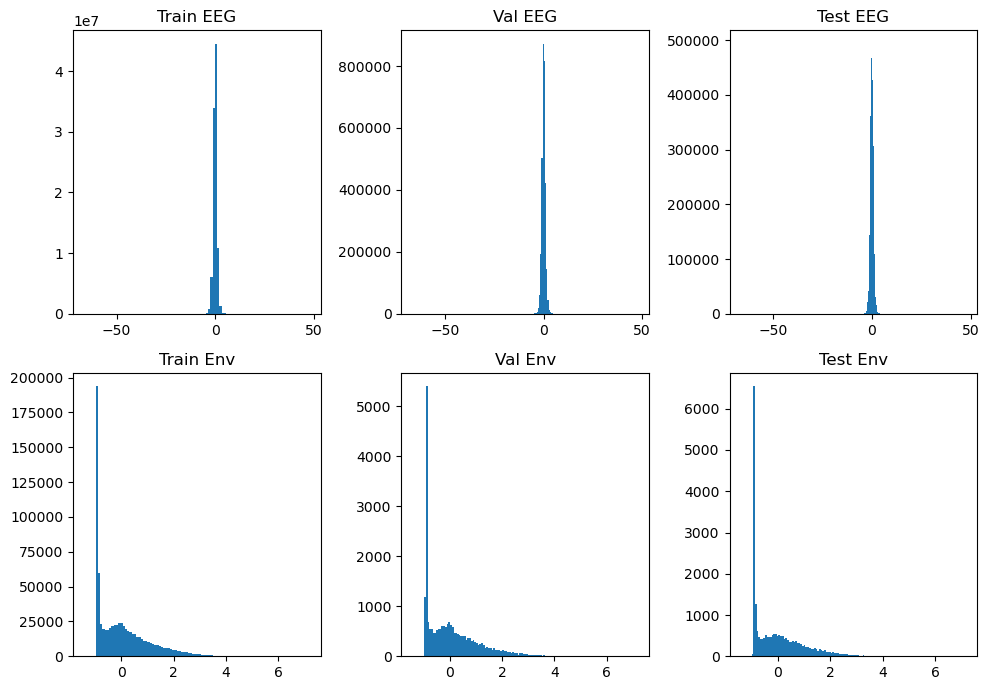

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 7), sharex='row')
ax[0, 0].hist(eegs_train.flatten().numpy(), bins=100);
ax[0, 0].set_title('Train EEG')
ax[0, 1].hist(eegs_val.flatten().numpy(), bins=100);
ax[0, 1].set_title('Val EEG')
ax[0, 2].hist(eegs_test.flatten().numpy(), bins=100);
ax[0, 2].set_title('Test EEG')
ax[1, 0].hist(envs_train.flatten().numpy(), bins=100);
ax[1, 0].set_title('Train Env')
ax[1, 1].hist(envs_val.flatten().numpy(), bins=100);
ax[1, 1].set_title('Val Env')
ax[1, 2].hist(envs_test.flatten().numpy(), bins=100);
ax[1, 2].set_title('Test Env')
plt.tight_layout()
plt.show();

### Pytorch dataloader

In [8]:
class MyDataset(Dataset):
    def __init__(self, eeg, env):
        self.eeg = eeg
        self.env = env
    
    def __getitem__(self, index):
        return self.eeg[index], self.env[index]
    
    def __len__(self):
        return len(self.eeg)
    
dataset_train = MyDataset(eegs_train, envs_train)
dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)

dl_val = DataLoader(MyDataset(eegs_val, envs_val), batch_size=batch_size, shuffle=True, drop_last=True)

## Model

In [9]:
class Conv2d(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, **kargs):
        super().__init__(in_channels, out_channels, kernel_size, **kargs)

    def __call__(self, inp):
        self.out = super().__call__(inp)

        if self.out.requires_grad:
            self.out.retain_grad()

        return self.out
    
    # -----------------------------------------------------------------------------------------------
class Flatten:
    
  def __call__(self, x):
    self.out = x.view(x.shape[0], -1)
    return self.out
  
  def parameters(self):
    return []
  
  # -----------------------------------------------------------------------------------------------
class Linear(nn.Linear):
    def __init__(self, x, y, **kargs):
        super().__init__(x, y, **kargs)

    def __call__(self, inp):
        self.out = super().__call__(inp)
        return self.out
  # -----------------------------------------------------------------------------------------------
   
class ELU(nn.ELU):
    def __init__(self, alpha=1.0, inplace=False):
        super().__init__(alpha=1.0, inplace=False)

    def __call__(self, inp):
        self.out = super().__call__(inp)
        if self.out.requires_grad:
            self.out.retain_grad()
        return self.out

  # -----------------------------------------------------------------------------------------------
class Sequential:
  
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        self.out = x
        return self.out

    def parameters(self):
        # get parameters of all layers and stretch them out into one list
        return [p for layer in self.layers for p in layer.parameters()]

    def named_parameters(self):
        # get parameters of all layers and stretch them out into one list
        return ((n, p) for layer in self.layers for n, p in layer.named_parameters())

In [10]:
# My implementation of the shallow convnet

fs = 64 # sampling rate
T = 5 * fs # number of time points in each trial
C = 64 # number of EEG channels
F1 = 8 # number of channels (depth) in the first conv layer
D = 2 # number of spatial filters in the second conv layer
F2 = D * F1 # number of channels (depth) in the pont-wise conv layer
num_classes = 4 # number of classes

shallow_covnet = Sequential([
    Conv2d(1, 40, (1, int(fs//2)), padding='same', bias=True),
    Conv2d(40, 40, (C, 1), padding=(0, 0), bias=False), nn.BatchNorm2d(40, affine=True), 
    nn.AvgPool2d((1, 75), (1, 15)), nn.Dropout(0.5),
    Conv2d(40, 4, kernel_size=(1, 30), padding='same', stride=(1, 1), bias=True),
    nn.Flatten(1, -1), # Flatten start_dim=1, end_dim=-1
    Linear(62*4, 4, bias=True),
])



In [11]:

class EEGEncoder(nn.Module):
    def __init__(self,             
            fs = 128, # sampling rate
            T = 5, # lenght of each trial in seconds
            C = 128, # number of EEG channels
            F1 = 8, # 8 or 4 number of channels (depth) in the first conv layer
            D = 2, # number of spatial filters in the second conv layer
            F2 = None # number of channels (depth) in the pont-wise conv layer
        ):
        super(EEGEncoder, self).__init__()

        if F2 is None:
            F2 = D * F1

        self.eeg_encoder = nn.Sequential(
            Conv2d(1, F1, (1, int(fs/2)), padding='same', bias=True, groups=1),
            nn.BatchNorm2d(F1, affine=True),
            Conv2d(F1, out_channels=D*F1, kernel_size=(C, 1), padding=(0, 0), bias=False, groups=F1),
            nn.BatchNorm2d(D*F1, affine=True), ELU(), nn.AvgPool2d(1, 4), nn.Dropout(0.25),
                    
            Conv2d(F2, F2, (1, int(fs/(2*4))), padding='same', bias=False, groups=D*F1),
            Conv2d(D*F1, F2, kernel_size=(1, 1), padding=(0, 0), groups=1, bias=False),
            nn.BatchNorm2d(F2, affine=True), ELU(), nn.AvgPool2d(1, 8), nn.Dropout(0.25),

            nn.Flatten(),
            #nn.Linear(F2*int((T*fs)//(8*4)), int(fs/4))
        ) 

    def forward(self, x):
        x = self.eeg_encoder(x)
        return x


def normalize_weights_eegnet(eeg_encoder):

    for ix, (name, param) in enumerate(eeg_encoder.named_parameters()):
        if  name == 'weight' and param.ndim==4 and ix==1: # normalize conv weights to max norm 1
            param.data = torch.renorm(param.data, 2, 0, maxnorm=1)
        elif name == 'weight' and param.ndim==2: # normalize fc weights to max norm 0.25
            param.data = torch.renorm(param.data, 2, 0, maxnorm=0.25)


eeg_encoder = EEGEncoder()
eeg_encoder.eeg_encoder

# Test the model, add no grad
with torch.no_grad():
    print(eeg_encoder(eegs_train[:32, :, :, :]).shape)

torch.Size([32, 320])


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525699189/work/aten/src/ATen/native/Convolution.cpp:896.)
  return F.conv2d(input, weight, bias, self.stride,


In [12]:
class EnvEncoder(nn.Module):

    def __init__(self,             
            fs = 128, # sampling rate
            T = 5, # lenght of each trial in seconds
            F1 = 4
        ):
        super(EnvEncoder, self).__init__()

        self.env_encoder = nn.Sequential(
            Conv2d(1, F1, (1, int(fs//2)), padding='same', bias=True),
            nn.BatchNorm2d(F1, affine=True), ELU(), nn.AvgPool2d(1, 2), nn.Dropout(0.5),
            Conv2d(F1, F1, (1, int(fs//4)), padding='same', bias=False, groups=1),
            nn.BatchNorm2d(F1, affine=True), ELU(), nn.AvgPool2d(1, 2), nn.Dropout(0.5),
            Conv2d(F1, F1*4, (1, int(fs//8)), padding='same', bias=False, groups=1),
            nn.BatchNorm2d(F1*4, affine=True), ELU(), nn.AvgPool2d(1, 8), nn.Dropout(0.5),
            nn.Flatten(),
            #nn.Linear(F1*int((T*fs)//(2*8)), int(fs/4))
        ) 

    def forward(self, x):
        x = self.env_encoder(x)
        return x

env_encoder = EnvEncoder()
env_encoder.env_encoder

# Test the model, add no grad
with torch.no_grad():
    print(env_encoder(envs_train[:32, :, :, :]).shape)

torch.Size([32, 320])


import torch
import torch.nn as nn

from collections import OrderedDict

params = OrderedDict([
    ('fc0', nn.Linear(in_features=4,out_features=4)),
    ('ReLU0', nn.ReLU()),
    ('fc1L:final', nn.Linear(in_features=4,out_features=1))
])
mdl = nn.Sequential(params)

# throws error
# mdl['fc0']

for m in mdl.children():
    print(m)

print()

for m in mdl.modules():
    print(m)

print()

for name, m in mdl.named_modules():
    print(name)
    print(m)

print()

for name, m in mdl.named_children():
    print(name)
    print(m)

In [13]:
class CES(nn.Module):
    def __init__(self, 
                 eeg_encoder= eeg_encoder.eeg_encoder,
                 env_encoder = env_encoder.env_encoder): 
        super().__init__()

        self.eeg_encoder = eeg_encoder
        self.env_encoder = env_encoder
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))

    def encode_eeg(self, x):
        return self.eeg_encoder(x)
    
    def encode_env(self, x):
        return self.env_encoder(x)
    
    def forward(self, eeg, env):
        eeg_features = self.encode_eeg(eeg)
        env_features = self.encode_env(env)
        return eeg_features, env_features, self.logit_scale.exp()
  

model = CES();
model.to(device)
#for n,p in model.named_parameters():
    #print(n, p.shape)


CES(
  (eeg_encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=same)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(8, 16, kernel_size=(128, 1), stride=(1, 1), groups=8, bias=False)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ELU(alpha=1.0)
    (5): AvgPool2d(kernel_size=1, stride=4, padding=0)
    (6): Dropout(p=0.25, inplace=False)
    (7): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=same, groups=16, bias=False)
    (8): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ELU(alpha=1.0)
    (11): AvgPool2d(kernel_size=1, stride=8, padding=0)
    (12): Dropout(p=0.25, inplace=False)
    (13): Flatten(start_dim=1, end_dim=-1)
  )
  (env_encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(1, 64), stride=(1, 1), pad

In [14]:
summary(eeg_encoder, (1, 128, 640))
summary(env_encoder, (1, 1, 640))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 128, 640]             520
       BatchNorm2d-2          [-1, 8, 128, 640]              16
            Conv2d-3           [-1, 16, 1, 640]           2,048
       BatchNorm2d-4           [-1, 16, 1, 640]              32
               ELU-5           [-1, 16, 1, 640]               0
         AvgPool2d-6           [-1, 16, 1, 160]               0
           Dropout-7           [-1, 16, 1, 160]               0
            Conv2d-8           [-1, 16, 1, 160]             256
            Conv2d-9           [-1, 16, 1, 160]             256
      BatchNorm2d-10           [-1, 16, 1, 160]              32
              ELU-11           [-1, 16, 1, 160]               0
        AvgPool2d-12            [-1, 16, 1, 20]               0
          Dropout-13            [-1, 16, 1, 20]               0
          Flatten-14                  [

## Model Setup

## Optimization

In [15]:

with torch.no_grad():
    for ix, layer in enumerate(model.eeg_encoder + model.env_encoder):
        if isinstance(layer, nn.Conv2d):
            layer.weight *= 0.01
            if layer.bias is not None:
                layer.bias *= 0

        if isinstance(layer, nn.Linear):
          layer.weight *= 0.01
          if layer.bias is not None:
            layer.bias *=0


print(sum(p.nelement() for p in model.parameters())) # number of parameters in total
for p in model.parameters():
    p.requires_grad = True

print(model.eeg_encoder)
print(model.env_encoder)

lr = 0.001
optimizer_adamw = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.05)
optimizer_nadam = optim.NAdam(model.parameters(), lr=lr)
optimizer = optimizer_nadam


5005
Sequential(
  (0): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=same)
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Conv2d(8, 16, kernel_size=(128, 1), stride=(1, 1), groups=8, bias=False)
  (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): ELU(alpha=1.0)
  (5): AvgPool2d(kernel_size=1, stride=4, padding=0)
  (6): Dropout(p=0.25, inplace=False)
  (7): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=same, groups=16, bias=False)
  (8): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ELU(alpha=1.0)
  (11): AvgPool2d(kernel_size=1, stride=8, padding=0)
  (12): Dropout(p=0.25, inplace=False)
  (13): Flatten(start_dim=1, end_dim=-1)
)
Sequential(
  (0): Conv2d(1, 4, kernel_size=(1, 64), stride=(1, 1), padding=same)
  (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=T

In [16]:
print("---  Data specs:   ---")
print(f" Train Set: shape EEG: {dataloader.dataset.eeg.shape}   Env: {dataloader.dataset.env.shape}")
print(f" Val Set: shape EEG: {eegs_val.shape}   Env: {envs_val.shape}")
print()
print("---  Model specs:  ---")
print(f" Number of parameters: {sum(p.nelement() for p in model.parameters())}") # number of parameters in total
print()
print("---  Training specs:  ---")
print(f" Train set: Batch size: {dataloader.batch_size}")
print(f" Train set: number of batches: {len(dataloader)}")
print(f" Val set: Batch size: {dl_val.batch_size}")
print(f" Val set: number of batches: {len(dl_val)}")
print(f"Chance level loss for Train set: {torch.tensor(1/batch_size).log():.4f}")
print(f"Learning rate: {lr}")


---  Data specs:   ---
 Train Set: shape EEG: torch.Size([1197, 1, 128, 640])   Env: torch.Size([1197, 1, 1, 640])
 Val Set: shape EEG: torch.Size([38, 1, 128, 640])   Env: torch.Size([38, 1, 1, 640])

---  Model specs:  ---
 Number of parameters: 5005

---  Training specs:  ---
 Train set: Batch size: 32
 Train set: number of batches: 37
 Val set: Batch size: 32
 Val set: number of batches: 1
Chance level loss for Train set: -3.4657
Learning rate: 0.001


# gradient not getting updateing
maybe because the chain removes the referencing ...

links to check for implementing the loss function:  

https://www.kaggle.com/code/moeinshariatnia/openai-clip-simple-implementation/notebook  


https://github.com/openai/CLIP/issues/83


https://github.com/mlfoundations/open_clip

https://github.com/mlfoundations/open_clip/blob/main/src/open_clip/loss.py

In [17]:
sys.getsizeof(eegs_train.storage())/1e6

392.233008

In [18]:
num_train = eegs_train.shape[0]
loss_batches = []
cnt = 0
lossi = []
udri = [] # update / data ratio 
ud = []
writer = SummaryWriter(log_dir=f"runs/nolinear_{time.strftime('%Y%m%d_%H%M%S')}")

for epoch in range(1, 50):

    print(f"====== Epoch: {epoch}")

    model.train()
    for ix_batch, (Xb_eeg, Xb_env) in enumerate(dataloader):

        # send to device
        Xb_eeg = Xb_eeg.to(device)
        Xb_env = Xb_env.to(device)

        # Zero out gradients
        optimizer.zero_grad()

        # forward pass
        eeg_features, env_features, logit_scale = model(Xb_eeg, Xb_env) 


        # normalize features
        eeg_features_n = eeg_features / eeg_features.norm(dim=1, keepdim=True)
        env_features_n = env_features / env_features.norm(dim=1, keepdim=True)

        # logits
        logits_per_eeg = logit_scale * eeg_features_n @ env_features_n.t()
        logits_per_env = logits_per_eeg.t()

        #loss function
        labels = torch.arange(batch_size).to(device)
        loss_eeg = F.cross_entropy(logits_per_eeg, labels)
        loss_env = F.cross_entropy(logits_per_env, labels)
        loss   = (loss_eeg + loss_env)/2

        # backward pass
        loss.backward()
        optimizer.step()


        loss_batches.append(loss.item())
        cnt += 1




        # track stats
        if ix_batch % 10 == 0:
            print(f'Batch: {ix_batch:7d}: {loss.item():.4f}  {loss_eeg.item():.4f}  {loss_env.item():.4f}   {eeg_features.detach().std().item():.4f}  {env_features.detach().std().item():.4f}')
        lossi.append(loss.log10().item())

        with torch.no_grad():
            ud = {f"p{ix}":(lr*p.grad.std() / p.data.std()).log10().item() for ix, p in enumerate(model.parameters()) }
            writer.add_scalars('UpdateOData/ud', ud, cnt)
            writer.add_scalar('Loss/train_batch', loss.item(), cnt)
        
        #break   

    loss_epoch = loss_batches[-(ix_batch + 1):]  # mean loss across batches
    loss_epoch = sum(loss_epoch) / len(loss_epoch)
    writer.add_scalar('Loss/train_epoch', loss_epoch, epoch)
    for pname, p in model.named_parameters():
      writer.add_histogram(f'Params/{pname}', p, epoch)
      writer.add_histogram(f'Grads/{pname}', p.grad, epoch)

    loss_val, *_ = eval_model_cl(dl_val, model, device=device)
    writer.add_scalar('Loss/val_epoch', loss_val, epoch)

    
    # normalize weights
    with torch.no_grad():
      normalize_weights_eegnet(model.eeg_encoder)

    model.train()
            
    #break   


====== Epoch: 1
Batch:       0: 4.0161  4.0123  4.0199   0.0095  0.9902
Batch:      10: 3.6750  3.6767  3.6733   0.0605  1.1379
Batch:      20: 3.6478  3.6520  3.6436   0.1153  1.1207
Batch:      30: 3.6589  3.6578  3.6601   0.1439  1.1175
====> Validation loss: 3.9049,  X1 loss: 4.3647   X2 loss: 3.4450
====== Epoch: 2
Batch:       0: 3.6316  3.6268  3.6363   0.1498  1.1119
Batch:      10: 3.5523  3.5478  3.5568   0.1681  1.1244
Batch:      20: 3.5860  3.5825  3.5896   0.2076  1.1241
Batch:      30: 3.4347  3.4375  3.4319   0.2314  1.1392
====> Validation loss: 3.2677,  X1 loss: 3.2702   X2 loss: 3.2652
====== Epoch: 3
Batch:       0: 3.4739  3.4704  3.4773   0.2671  1.1334
Batch:      10: 3.2906  3.2893  3.2918   0.2858  1.1540
Batch:      20: 3.4960  3.4975  3.4945   0.3136  1.1299
Batch:      30: 3.4719  3.4750  3.4689   0.3273  1.1296
====> Validation loss: 3.6240,  X1 loss: 3.6369   X2 loss: 3.6112
====== Epoch: 4
Batch:       0: 3.3472  3.3448  3.3495   0.3348  1.1417
Batch:    

In [19]:
eegs_val.device, envs_val.device

(device(type='cpu'), device(type='cpu'))

layer 4 (       ELU):  mean  +0.001940, std 7.431358e-01, range [-9.998240e-01  6.666777e+00]
torch.Size([32, 16, 1, 640])
layer 10 (       ELU):  mean  +0.053019, std 6.361878e-01, range [-9.832652e-01  3.650266e+00]
torch.Size([32, 16, 1, 160])
layer 2 (       ELU):  mean  -0.052800, std 6.857168e-01, range [-9.990959e-01  5.433700e+00]
torch.Size([32, 4, 1, 640])
layer 7 (       ELU):  mean  +0.085343, std 8.153924e-01, range [-9.933386e-01  4.152119e+00]
torch.Size([32, 4, 1, 320])
layer 12 (       ELU):  mean  +0.004810, std 6.478294e-01, range [-9.829742e-01  3.220995e+00]
torch.Size([32, 16, 1, 160])


AttributeError: 'NoneType' object has no attribute 'mean'

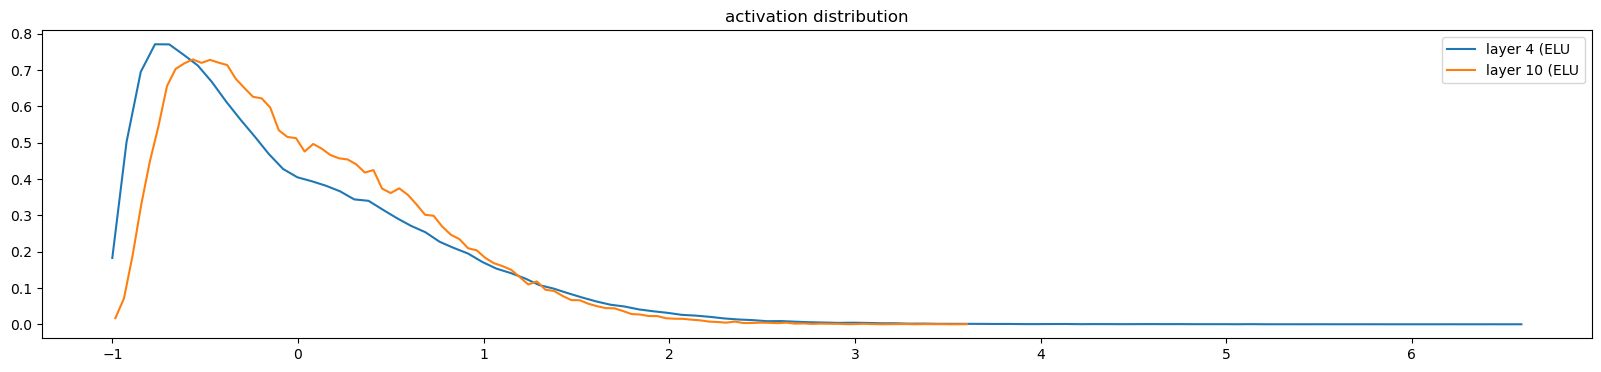

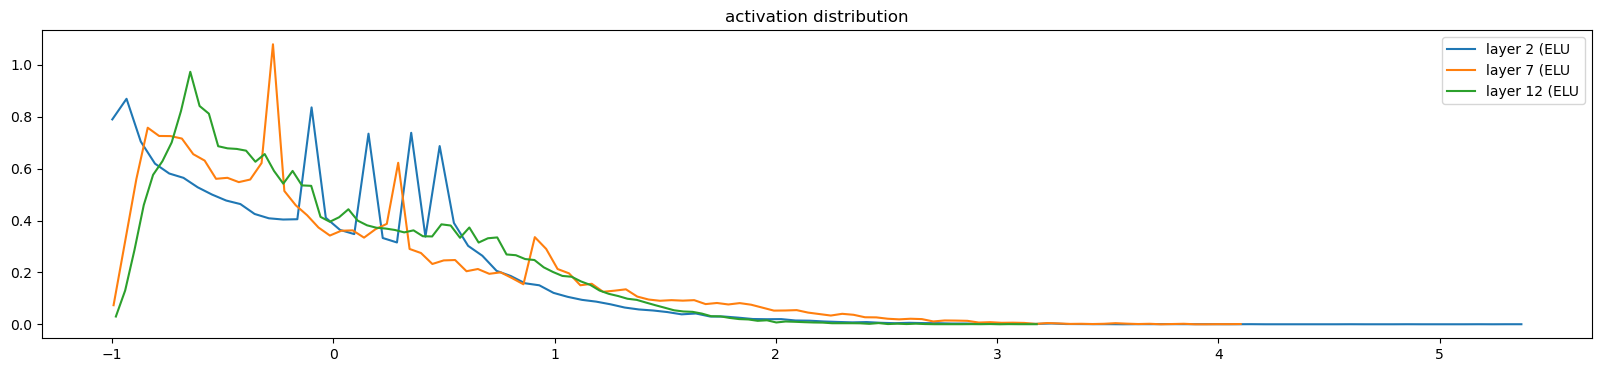

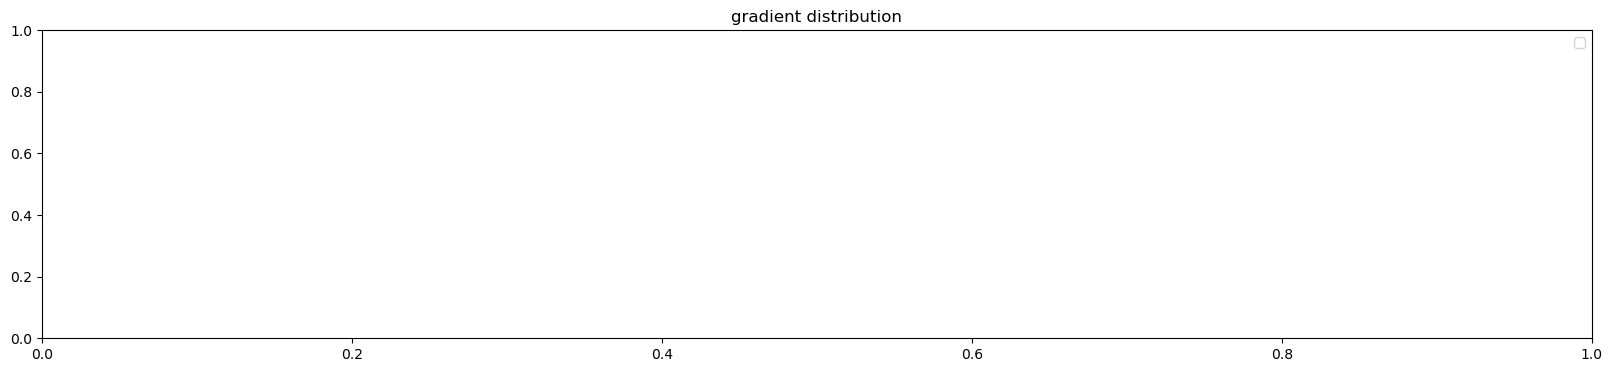

In [20]:
# ELU Activations and their gradients

plt.figure(figsize=(20, 4)); # width and height of the plot
legends = []
for i, layer in enumerate(model.eeg_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, (ELU)):
        t = layer.out
        print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
        print(t.shape)
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
    plt.legend(legends);
    plt.title('activation distribution')



plt.figure(figsize=(20, 4)); # width and height of the plot
legends = []
for i, layer in enumerate(model.env_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, (ELU)):
        t = layer.out
        print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
        print(t.shape)
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
    plt.legend(legends);
    plt.title('activation distribution')


plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(model.eeg_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, ELU):
        t = layer.out.grad
        print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends);
    plt.title('gradient distribution')


plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(model.env_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, ELU):
        t = layer.out.grad
        print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends);
    plt.title('gradient distribution')


In [ ]:
# Conv2d Activations and their gradients
if True:
    plt.figure(figsize=(20, 4)); # width and height of the plot
    legends = []
    for i, layer in enumerate(model.eeg_encoder[:-1]): # note: exclude the output layer
        if isinstance(layer, (Conv2d)):
            t = layer.out.to('cpu')
            print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
            print(t.shape)
            hy, hx = torch.histogram(t, density=True)
            plt.plot(hx[:-1].detach(), hy.detach())
            #plt.xlim(-.1, .1)
            #plt.ylim(0, 1000)
            legends.append(f'layer {i} ({layer.__class__.__name__}')
        plt.legend(legends);
        plt.title('activation distribution')

    plt.figure(figsize=(20, 4)); # width and height of the plot
    legends = []
    for i, layer in enumerate(model.env_encoder[:-1]): # note: exclude the output layer
        if isinstance(layer, (Conv2d)):
            t = layer.out.to('cpu')
            print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
            print(t.shape)
            hy, hx = torch.histogram(t, density=True)
            plt.plot(hx[:-1].detach(), hy.detach())
            legends.append(f'layer {i} ({layer.__class__.__name__}')
        plt.legend(legends);
        plt.title('activation distribution')


    plt.figure(figsize=(20, 4)) # width and height of the plot
    legends = []
    for i, layer in enumerate(model.eeg_encoder[:-1]): # note: exclude the output layer
        if isinstance(layer, Conv2d):
            t = layer.out.grad
            print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
            hy, hx = torch.histogram(t, density=True)
            plt.plot(hx[:-1].detach(), hy.detach())
            legends.append(f'layer {i} ({layer.__class__.__name__})')
        plt.legend(legends);
        plt.title('gradient distribution')


    plt.figure(figsize=(20, 4)) # width and height of the plot
    legends = []
    for i, layer in enumerate(model.env_encoder[:-1]): # note: exclude the output layer
        if isinstance(layer, Conv2d):
            t = layer.out.grad
            print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
            hy, hx = torch.histogram(t, density=True)
            plt.plot(hx[:-1].detach(), hy.detach())
            legends.append(f'layer {i} ({layer.__class__.__name__})')
        plt.legend(legends);
        plt.title('gradient distribution')



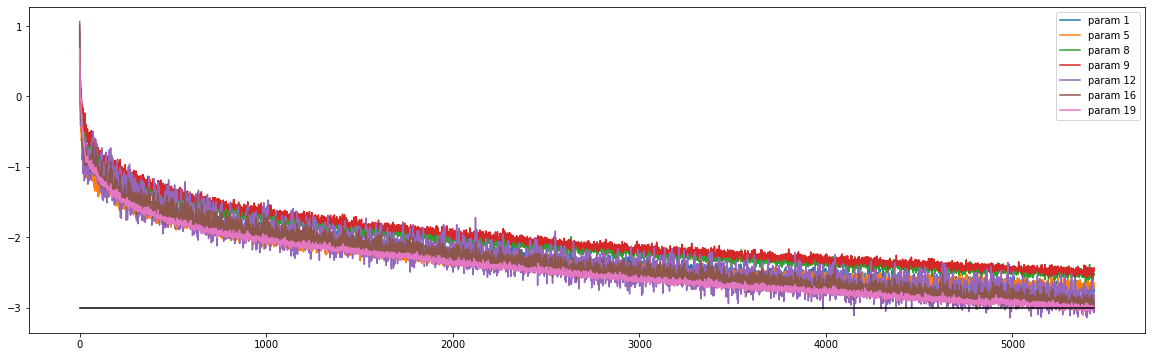

In [ ]:
# Check the update / data ratio

plt.figure(figsize=(20, 6))
legends = []
for i, p in enumerate(model.parameters()):
    if p.ndim == 4:
        plt.plot([ud[j][i] for j in range(len(ud))])
        legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these rations should be ~1e-3, indicate on plot.
plt.legend(legends);